In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.shape

(284807, 31)

In [6]:
from collections import Counter

In [7]:
clas=Counter(df['Class'])
l=[]
v=[]
for i,j in clas.items():
    l.append(i)
    v.append(j)

In [8]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

In [9]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x14b203de9e0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

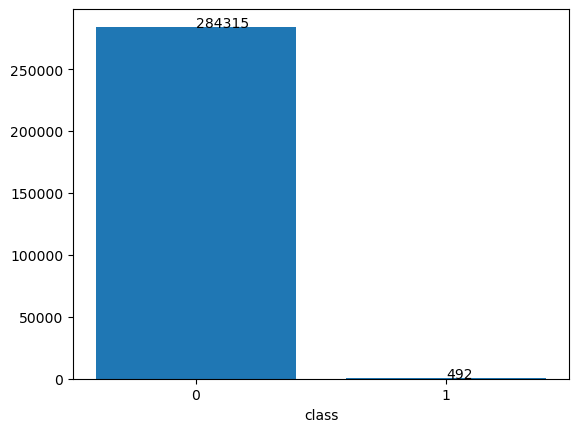

In [10]:
plt.bar(l,v)
addlabels(l,v)
plt.xlabel('class')
plt.xticks([0,1])

In [11]:
from imblearn.under_sampling import NearMiss

In [12]:
nm=NearMiss()
x,y=nm.fit_resample(df.iloc[:,:30],df['Class'])

In [13]:
clas=Counter(y)
l=[]
v=[]
for i,j in clas.items():
    l.append(i)
    v.append(j)

([<matplotlib.axis.XTick at 0x14b23aa2050>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

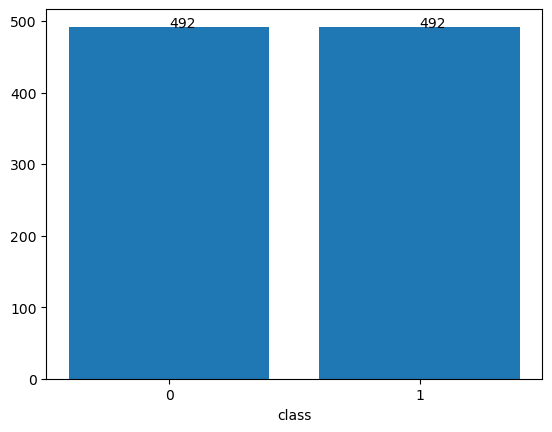

In [14]:
plt.bar(l,v)
addlabels(l,v)
plt.xlabel('class')
plt.xticks([0,1])

In [15]:
x.shape

(984, 30)

In [16]:
from sklearn.feature_selection import SelectKBest,f_classif

In [17]:
sb=SelectKBest(f_classif,k=5)
x=sb.fit_transform(x,y)
x

array([[ 0.68501088, -0.30445261,  0.05563846,  0.6278442 , -0.43549932],
       [ 0.69107703, -0.29272216, -0.01000578,  0.40947945, -0.35255003],
       [-0.28295604,  0.61390264,  1.10086129,  0.04291077, -0.28140182],
       ...,
       [ 0.46830839, -3.46389088,  1.79496897, -2.77502154, -4.05716238],
       [ 1.81709247, -5.24598384,  1.93351954, -5.0304648 , -6.41662798],
       [ 0.40866999, -0.88872168,  0.49114024,  0.72890332, -1.94888335]])

In [18]:
col=sb.get_support(indices=True)
for i in col:
    print(df.columns[i])

V4
V10
V11
V12
V14


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [23]:
rfc.score(x_test,y_test)

0.9441624365482234

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)

In [26]:
lr.score(x_test,y_test)

0.6334189089909632

In [27]:
from sklearn.metrics import f1_score,recall_score,precision_score

In [28]:
f1_score(y_pred,y_test)

0.9417989417989417

In [29]:
recall_score(y_pred,y_test)

0.956989247311828

In [30]:
precision_score(y_pred,y_test)

0.9270833333333334